In [208]:
import numpy as np
import matplotlib.pyplot as plt

In [209]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [210]:
#a function which takes an array of x and y to calculate the cost value/loss for each of it then add it like errors

def cost_function(x,y,w,b,lamb,sigmoid):
    m = len(x)
    cost = 0
    for i in range(m):

        y_hat = sigmoid(np.dot(w,x[i]) + b)
        cost += y[i]*np.log(y_hat) + (1-y[i])* np.log(1-y_hat)                                   #COST FUNCTION
    regularization = (lamb / (2 * m)) * np.sum(w ** 2)
    return -cost/(2*m) + regularization

In [211]:
def calculate_gradient(x,y,w,b,sigmoid,lamb):
    # differentiate with respect to all the parameters
    m = len(x)
    dw = np.zeros_like(w)
    db = 0

    for i in range(m):
        y_hat = np.dot(w,x[i]) + b
        fx = sigmoid(y_hat)
        dw += ((fx) - y[i]) * x[i]
        db += (fx) - y[i]

    dw = dw / m + (lamb / m) * w
    db = db / m
    return dw, db

In [212]:


def gradient_descent(learning_rate, x, y, w, b, cost_function, calculate_gradient,lamb,sig, num_iterations=1000):
    J_history = []
    p_history = []
    iter = []
    m = len(x)

    for i in range(num_iterations):
        dw, db = calculate_gradient(x, y, w, b,sig,lamb)
        w -= learning_rate * dw
        b -= learning_rate * db

        J_history.append(cost_function(x, y, w, b,lamb,sig))
        p_history.append([w.copy(), b])
        iter.append([i + 1, cost_function(x, y, w, b,lamb,sig)])

    return w, b, J_history, p_history, iter

In [213]:
# Manual feature normalization function z score/mean normalization method

def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

Regularized cost: 0.306880498993128
Updated weights: [ 0.85434987  1.03282584 -0.24937629 -0.26763326 -0.36215726  0.19114967]
Updated bias: 0.1423913018419233
[-0.15400418  0.63000378 -1.66822878 -0.70491989 -1.26258812 -1.3562929 ]


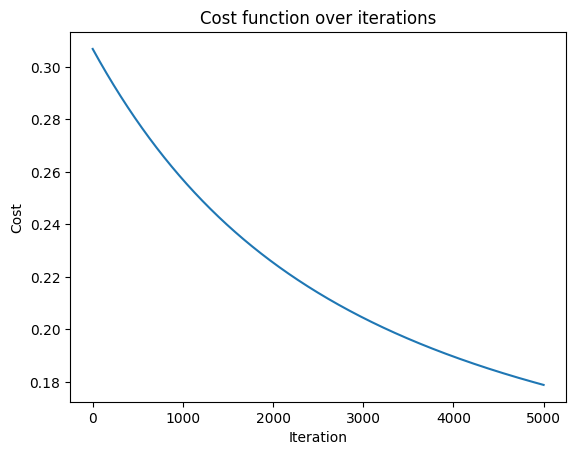

In [214]:
np.random.seed(1)
X_tmp = np.random.rand(100, 6)  # Use 2D data for visualization
y_tmp = (X_tmp[:, 0] + X_tmp[:, 1] > 1).astype(int)  # Simple linear boundary
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,) - 0.5
b_tmp = 0.5
lambda_tmp = 0.7
learning_rate = 0.001

# Normalize features
# scaler = StandardScaler()
# X_tmp = scaler.fit_transform(X_tmp)
X_tmp = normalize_features(X_tmp)

cost_tmp = cost_function(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp,sigmoid= sigmoid)
print("Regularized cost:", cost_tmp)

w_tmp, b_tmp, J_history, p_history, iter_history = gradient_descent(learning_rate, X_tmp, y_tmp, w_tmp, b_tmp, cost_function, calculate_gradient, lambda_tmp,sigmoid, 5000)
print("Updated weights:", w_tmp)
print("Updated bias:", b_tmp)
print(X_tmp[0])
# Convert iter_history to numpy array for easier plotting
iter_history = np.array(iter_history)

# Plot the cost function over iterations
plt.plot(iter_history[:, 0], iter_history[:, 1])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

In [215]:
def plot_decision_boundary(x, y, w, b):
    plt.figure(figsize=(10, 6))
    
    # Plot the data points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', alpha=0.7)

    # Calculate the decision boundary
    x_boundary = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)
    y_boundary = -(w[0] * x_boundary + b) / w[1]

    # Plot the decision boundary
    plt.plot(x_boundary, y_boundary, 'k--', label='Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

## I increased the number of points so working of algorithm is more clear. WITHOUT NORMALIZATION THIS WON'T WORK

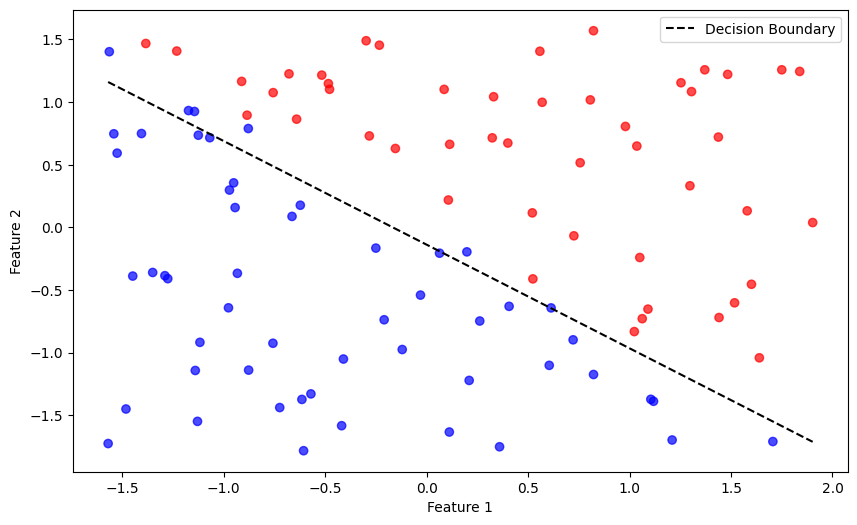

In [216]:
plot_decision_boundary(X_tmp, y_tmp, w_tmp, b_tmp)